![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

## Import (required packages)

In [17]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())
print(penguins_df.info())
print(penguins_df.describe())
print(penguins_df.isna().sum().sort_values())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
       culmen_length_mm  culmen_depth_mm

## Preprocessing

In [18]:
#converting non-numeric to numeric data
penguins_df_dummies = pd.get_dummies(penguins_df,drop_first=True)
#scaling data (Standard scaler mean 0 and variance 1)
#Standardization
scaler = StandardScaler()
penguins_df_dummies_scaled = scaler.fit_transform(penguins_df_dummies)
#since scaler transformation returns a numpy array converting back to DataFrame
penguins_df_dummies_scaled = pd.DataFrame(penguins_df_dummies_scaled)

## Optimal number of clusters (Elbow analysis)

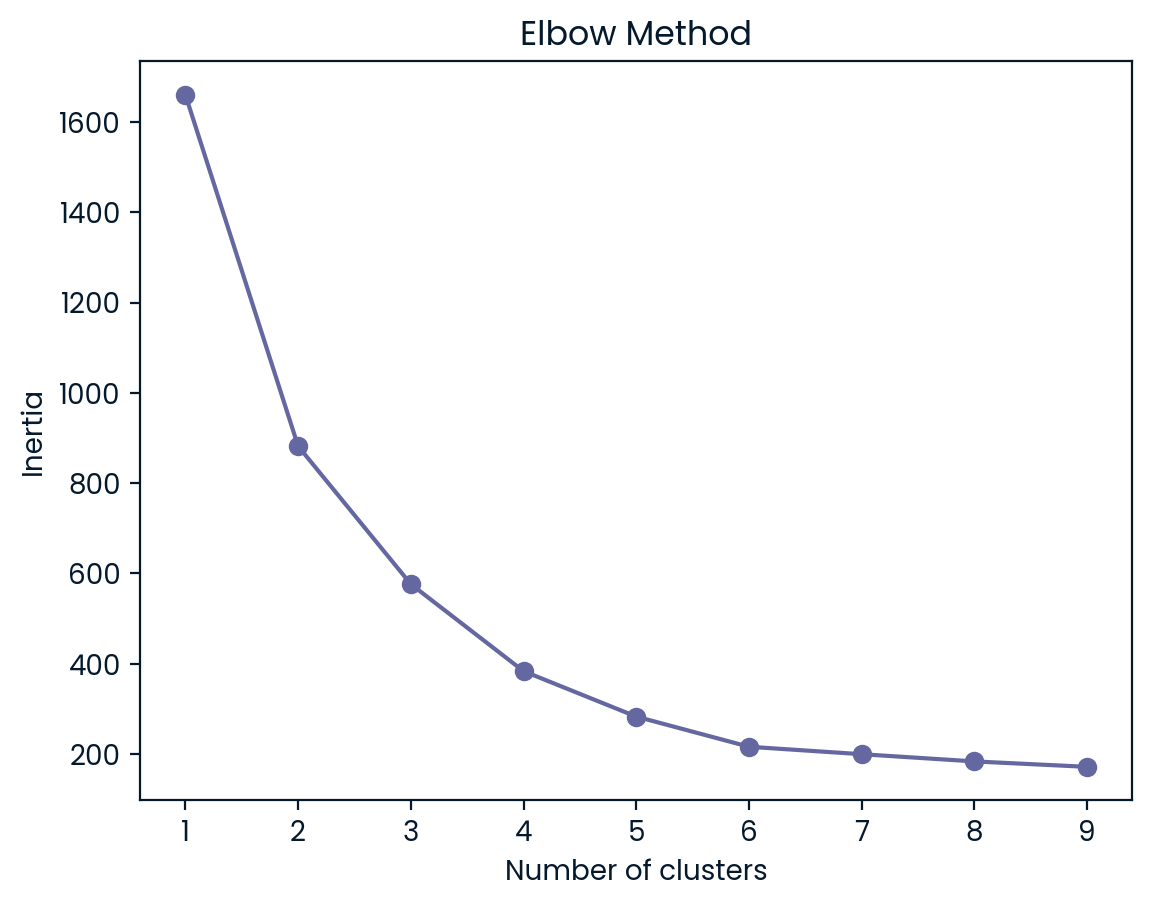

In [19]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k,random_state=12)
    model.fit(penguins_df_dummies_scaled)
    inertias.append(model.inertia_)
plt.plot(ks,inertias,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
    

## Apply KMeans Clustering

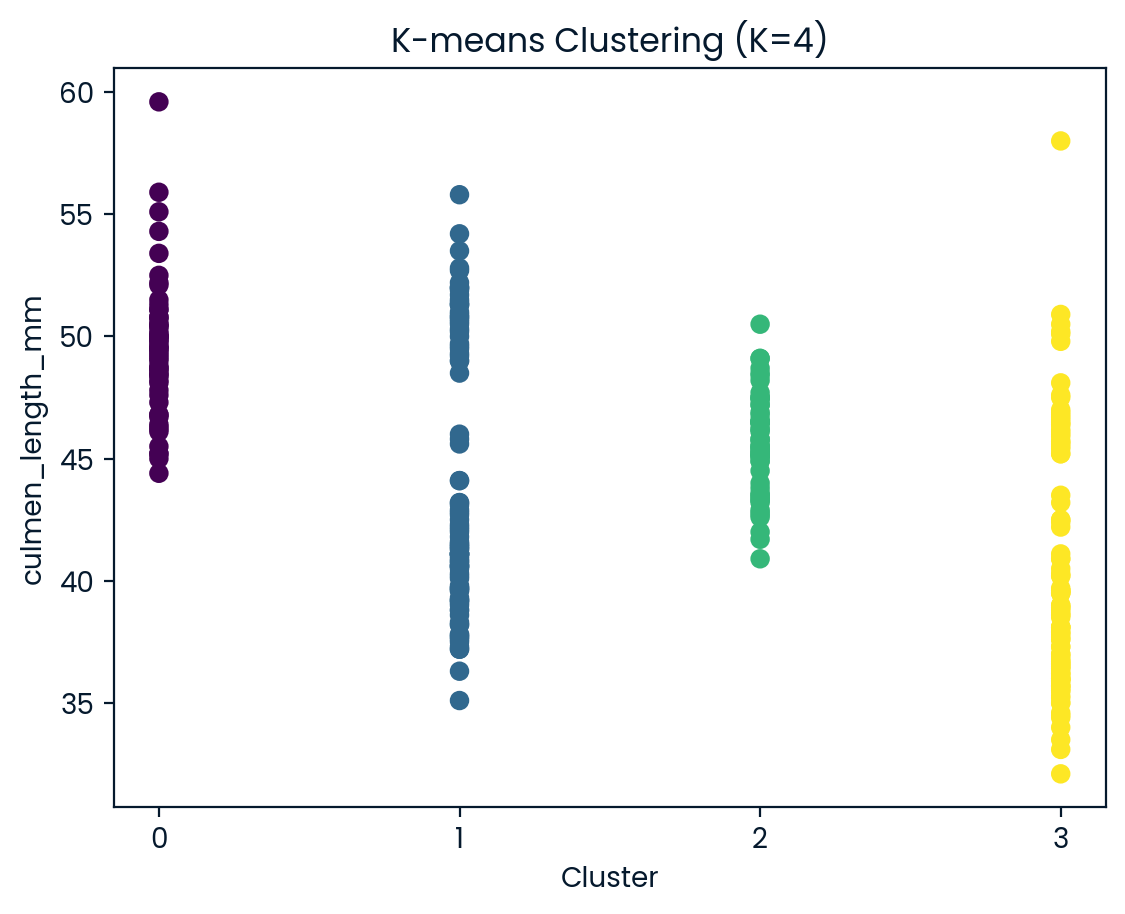

In [20]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters,random_state=12)
kmeans.fit(penguins_df_dummies_scaled)
labels = kmeans.predict(penguins_df_dummies_scaled)
#or attribute simply kmeans.labels_
penguins_df['label'] = labels
# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=labels, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

## Stats_Penguins DataFrame

In [21]:
#The output is a DataFrame with one row per cluster that shows mean of original variables
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             49.473770        15.718033         221.540984
1             43.878302        19.111321         194.764151
2             45.563793        14.237931         212.706897
3             40.217757        17.611215         189.046729
